# COMPSCI 371D Homework 4

## Part 1: Line Search

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 1.1

In [2]:
x = np.linspace(-3,7,num=200)

In [3]:
def f(x):
    return np.sin((np.pi * x + 1)/2)

In [4]:
points = []
for i in [0.0,2.0,5.0]:
    points.append([i,f(i)])

f(0.0) = 0.4794
f(2.0) = -0.4794
f(5.0) = 0.8776


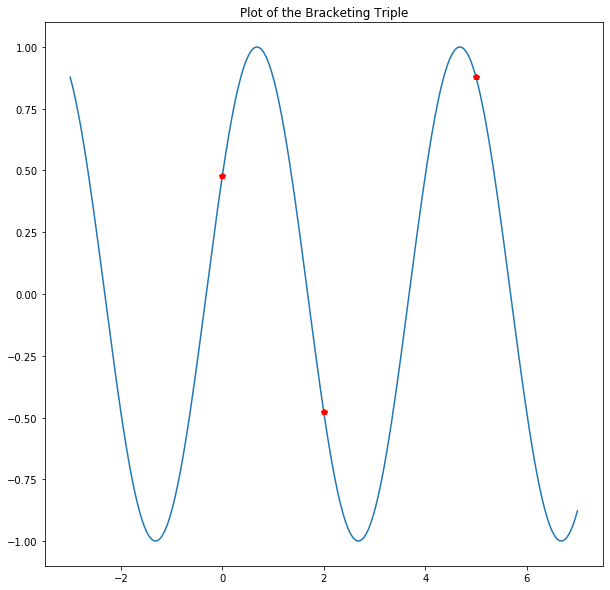

In [5]:
fig = plt.figure(figsize=(10,10))
plt.plot(x,f(x))
for p in points:
    plt.plot(p[0],p[1],'rp')
    print("f(%.1f) = %.4f" % (p[0],p[1]))
t = plt.title('Plot of the Bracketing Triple')

### Problem 1.2

The above are a valid bracketing triple because $0<2<5$, $f(2)<f(0)$, and $f(2)<f(5)$.

The requirements needed to form a bracketing triple are met with points 0,2, and 5 and their corresponding values.

### Problem 1.3

$(a',b',c')=(0,2,3.5)$

Because $(b-a=2)<(c-b=3)$, so $z=(b+c)/2=3.5$. Then $f(z)>f(b)$ so the new triple will be $(a,b,z)$.

### Problem 1.4 (Exam-Style)

Using line search, you start off with an interval for which the search is done. With each iteration of line search, the interval is reduced to a percantage of itself, but the iterval is updated every time, so the reduction is always in reference of the new interval. Eventually, your interval will be infinitesimally small, but it is still an interval, so you can find a new bracketing triple in that interval. Since this is the case, you can never converge to the exact minimum of $f$ and therefore must set a delta which indicates to the function when you are willing to stop the search.

$a^* = \frac{3\pi - 1}{\pi}$ with a minimum value: $f(a^*)=-1$

## Part 2: Coordinate Descent

In [6]:
def rosenbrock(z):
    return np.array(100 * (z[1] - z[0] ** 2) ** 2 + (1 - z[0]) ** 2)

In [7]:
from scipy import optimize

def line_search(function, a, epsilon_delta_z):
    outcome = optimize.minimize_scalar(function, (a, a + 1.e-4), tol=epsilon_delta_z)
    if outcome['success']:
        return outcome['x'], outcome['fun']
    else:
        print('Line search failed:', outcome['message'])
        return None, None

In [8]:
def show_history(hist, z_opt):
    h, z, n = [], [], 101
    for i in range(2):
        hi = [item[i] for item in hist]
        h.append(hi)
        z.append(np.linspace(np.floor(np.min(hi) - 1.0), np.ceil(np.max(hi) + 1.0), n))
    Y = np.array([[rosenbrock(np.array([a, b])) for a in z[0]] for b in z[1]])
    levels = np.logspace(0.01, 5, num=10)
    plt.contour(z[0], z[1], Y, levels, colors='grey', linewidths=1)
    plt.plot(h[0], h[1])
    plt.plot(h[0][0], h[1][0], 'bo')
    plt.plot(z_opt[0], z_opt[1], 'ro')
    plt.title('{} line searches'.format(len(hist)-1))
    plt.show()

In [9]:
z_0, z_star = np.array([-2.0, -2.0]), np.array([1.0, 1.0])

### Problem 2.1

In [10]:
def descend(f, z, epsilon_delta_z=1.e-5, epsilon_delta_f=1.e-10, max_iterations=5000,
            history=None, search=line_search):
    history.append(z)
    z_0 = np.copy(z)
    z_1 = np.copy(z)
    for k in range(max_iterations):
        z_0 = np.copy(z_1)
        
        if k%2 == 0:
            def func(c):
                return f([c, z_0[1]])
            z_1[0] = search(func, (z_0[0]), epsilon_delta_z)[0]
        else:
            def func(c):
                return f([z_0[0], c])
            z_1[1] = search(func, (z_0[0]), epsilon_delta_z)[0]
        
        history.append(z_1)
              
        if (np.linalg.norm(z_1-z_0) < epsilon_delta_z) or (f(z_0)-f(z_1) < epsilon_delta_f):
            return z_1, f(z_1)
            
    print("Warning: Max Iterations Reached")
    return z_1, f(z_1)

Wall time: 303 ms


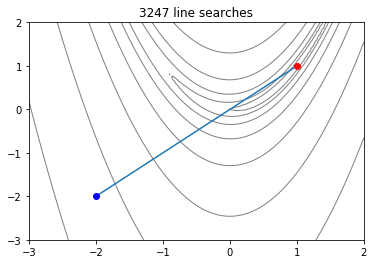

In [11]:
h = []

z_0, z_star = np.array([-2.0, -2.0]), np.array([1.0, 1.0])

%time z, y = descend(rosenbrock, z_0, history=h)
show_history(h, z_star)

In [12]:
print('Converges to (%.4f, %.4f) with function value %.8f' % (z[0], z[1], y))

Converges to (0.9960, 0.9921) with function value 0.00001573


### Problem 2.2

In [13]:
def yann_search(func, a, epsilon_delta_z):
    s = epsilon_delta_z/10
    a_init = a
    b = a_init + s
    fa = np.round(func(a_init),6)
    fb = np.round(func(b),6)
    
    if fb > fa:
        s = -1*s
        a = b
        b = a_init
        fa = np.round(func(a),6)
        fb = np.round(func(b),6)
    
    while fa > fb:
        a = b
        b = a + s
        fa = np.round(func(a),6)
        fb = np.round(func(b),6)
        if fa == fb:
            break
            
    return a, f(a)

Wall time: 38.7 s


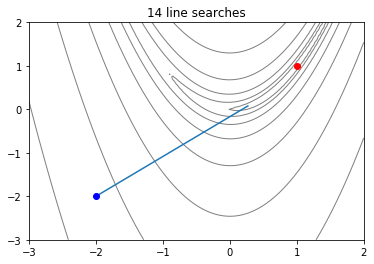

In [14]:
history = []

z_0, z_star = np.array([-2.0, -2.0]), np.array([1.0, 1.0])

%time z, y = descend(rosenbrock, z_0, history=history, search=yann_search)
show_history(history, z_star)

In [15]:
print('Converges to (%.4f, %.4f) with function value %.4f' % (z[0], z[1], y))

Converges to (0.2695, 0.0775) with function value 0.5361


### Problem 2.3

The final results are fairly similar, but the execution time of the yann search is much greater than the time for line search. Line search has more iterations though because yann search spends more time on each iteratoin.

### Problem 2.4 (Exam-Style)

If the step size $s$ is larger, than more data would be ignored as the you iterate through the data, therfore, the chance of missing the minimum point or other fluctions in data would increase.